### Perceptron Learning(Single Layer Perceptron)

In [31]:
from sklearn import datasets

In [32]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [33]:
x, y = datasets.make_blobs(n_samples = 150, n_features = 2, centers = 2,
                          cluster_std = 1.05, random_state = 2)

In [34]:
y

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1])

Text(0.5, 1.0, 'Random Classification with 2 classes')

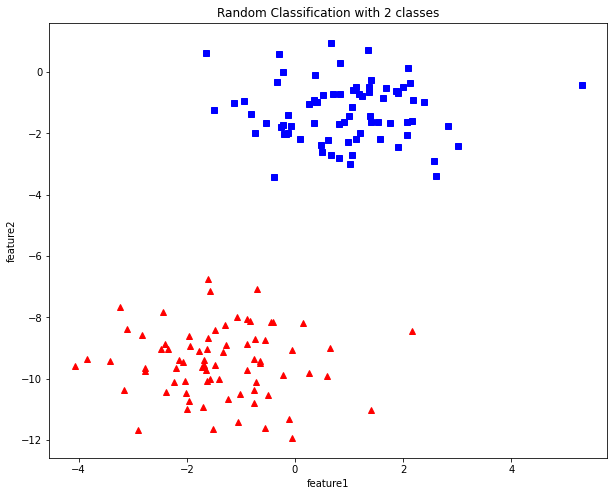

In [35]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,8))
plt.plot(x[:,0][y==0],x[:,1][y==0],'r^')
plt.plot(x[:,0][y==1],x[:,1][y==1],'bs')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.title('Random Classification with 2 classes')

In [36]:
def step_func(z):
    if (z>0):
        return 1.0 
    else:
        return 0.0

In [37]:
# This function is usede to deploy perceptron learning, the logic of weight updation rule will be 
# implemented in the body of the function.
# The data variables will be used as follows.
# X = matrix of input feature
# y = column of labels or target
# lr = learning rate
# apox = number of iterations
# m = number of training samples
# n = number of features
# weights = connection weights
# n_miss_list  = an array of miss classified examples

In [45]:
def perceptron(x, y, lr, epochs):
    m,n = x.shape
    weights = np.zeros((n+1,1))
    n_miss_list = []
    for epoch in range(epochs):
        n_miss = 0
        for idx, x_i in enumerate(x):
            x_i = np.insert(x_i, 0, 1).reshape(-1, 1)
            y_hat = step_func(np.dot(x_i.T, weights))
            if(np.squeeze(y_hat) - y[idx])!= 0:
                weights += lr*((y[idx] - y_hat)* x_i)
                n_miss += 1
        n_miss_list.append(n_miss)
    return weights, n_miss_list

In [54]:
def plot_decision_boundary(x, weights):
    x1 = [min(x[:,0]), max(x[:,0])]
    m = -weights[1]/weights[2]
    c = -weights[0]/weights[2]
    x2 = m*x1+c
    fig = plt.figure(figsize = (10,10))
    plt.plot(x[:,0][y==0],x[:,1][y==0],'r^')
    plt.plot(x[:,0][y==1],x[:,1][y==1],'bs')
    plt.xlabel('feature1')
    plt.ylabel('feature2')
    plt.title('Perceptron Learning')
    plt.plot(x1, x2, 'y-')

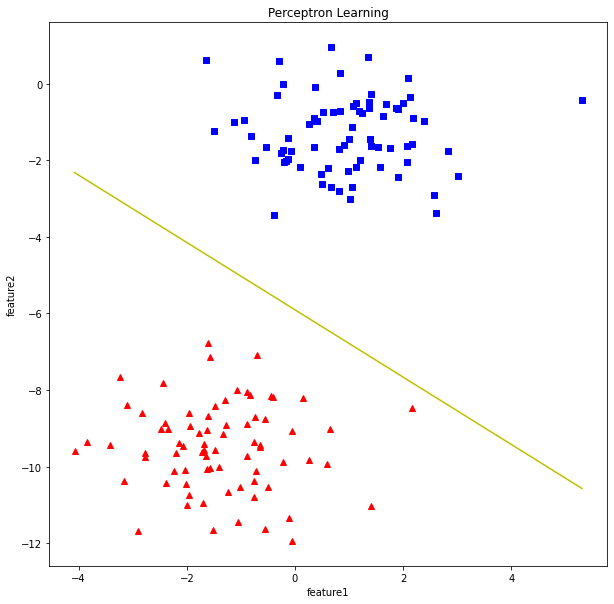

In [55]:
weights, miss_l = perceptron(x, y, 0.5, 100)
plot_decision_boundary(x, weights)

In [56]:
# Viva Questions
# Functions used in the program 
# make_blobs = this function is used to synthetically generate a dataset
# n_samples = total number of samples from the dataset
# n_features = total number of input features
# centers = total number of groups, clusters or classes you want
# np.zeros = this python function returns a new array of given shape and size filled with zeros. 
# Eg: np.zeros(5) o/p: ([0,0,0,0,0]), np.zeros(2,1) o/p: ([[0],[0]]), np.zeros(2,2) o/p: ([[0,0],[0,0]])
# np.insert = insert values along the given axis [Eg: SUppose we have array a = ([[1, 1], [2, 2], [3, 3]])
# if we give command np.insert(a,1,5,axis=1), then 5 will insert in "a" at column = 1 o/p: ([[1,5,1],[2,5,2],[3,5,3]])
# np.reshape(-1,1) = gives new shape to the numpy arraqy, np allow us to give one parameter in the reshape function as -1
# Eg: 2,-1 is allowed; -1,1 is allowe but -1,-1 is not allowed
# -1 means unknown dimensions and we want numpy to figure it out. Eg: z = ([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
# z.reshape(-1) will convert this array into a single row as follows ([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
# np.squeeze = removes single dimensional entries from the shape of an array
# Eg: z = np.array([[2,2,2],[2,2,2]]) o/p: 

In [69]:
z = np.array([[[2,2,2],[2,2,2]]])

In [71]:
z.squeeze()

array([[2, 2, 2],
       [2, 2, 2]])